<a href="https://colab.research.google.com/github/nikkird/GRIP/blob/main/DSBA_Task1_StudentMarksPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GRIP - The Sparks Foundation

### **Task 1: Prediction using Supervised ML**

##### Predict the percentage of an student based on the no. of study hours.
##### This is a simple linear regression task as it involves just 2 variables.


---


##### Sample Dataset link: http://bit.ly/w-data


---

##### **By - Nikita Dinde**

### **IMPORTING LIBRARIES**

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **IMPORTING DATASET**

In [8]:
df = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully!")
df.head()

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
df.shape

(25, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **SCATTER PLOT**

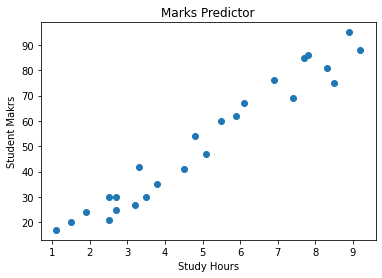

In [16]:
plt.scatter(x=df.Hours, y=df.Scores)  
plt.title('Marks Predictor')  
plt.xlabel('Study Hours')  
plt.ylabel('Student Makrs')  
plt.show()

From the above graph, it is clear that there is a positive linear relation between the number of hours studied and percentage of score.

In [18]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Splitting the data into Dependent and Independent Variables**

In [19]:
X = df.iloc[:, :-1].values  # independent variable
y = df.iloc[:, 1].values  # dependent variable

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [34]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Splitting Data**

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### **Linear Regression**
**Training the Algorithm**

In [21]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

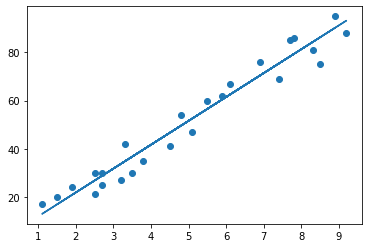

In [24]:
# Plotting the Regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### **PREDICTIONS**

In [26]:
# Predicting the Percentages
print(X_test) # Testing data in Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
# Comparing actual marks vs predicted marks
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the Model**

Final step is the evaluate the performance of algorithm

In [28]:
# Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002982


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

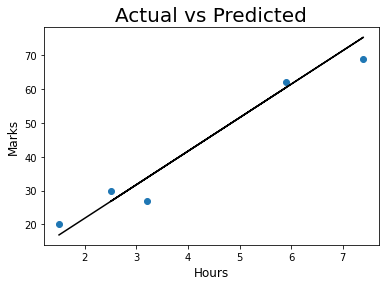

In [31]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks', size=12)
plt.xlabel('Hours', size=12)
plt.show()

### **SOLUTION**

In [33]:
hours = [9.25]
answer = lr.predict([hours])
print("Score = {}".format(round(answer[0],4)))

Score = 93.6917


### If a student studies for 9.25 hours a day, according to the regression model he/she is likely to score 93.69 marks.